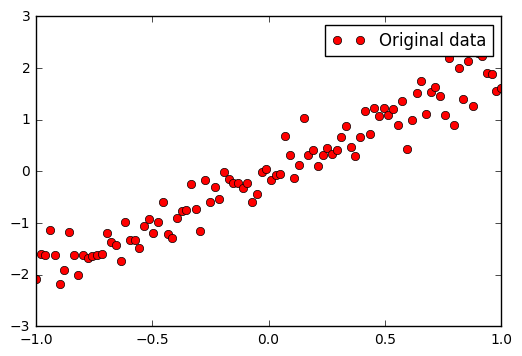

In [1]:
# 实例描述
# 假设有一组数据集，其x和y的对应关系为y≈2x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 生成100个-1到1的点
train_X = np.linspace(-1,1,100)
# np.random.randn(*train_X.shape)等同于np.random.randn(100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
# 显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [2]:
plotdata =  {'batchsize':[],'loss':[]}
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

In [3]:
# 创建模型，正向搭建 模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1],name='weight')) # tf.random_normal从正太分布中取出指定个数的值
b = tf.Variable(tf.zeros([1]),name='bias')
# 前向结构
z = tf.multiply(X,W) + b

# 将预测值以直方图显示
tf.summary.histogram('z',z)

# 反向搭建模型
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))  # tf.reduce_mean取均值

# 将损失以标量形式显示
tf.summary.scalar('loss_function', cost)

# 学习率
learning_rate = 0.01
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 训练模型
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20 # 迭代次数
display_step = 2

Epoch: 1 cost= 2.3247395 W= [-0.291673] b= [0.66558516]
Epoch: 3 cost= 0.26812562 W= [1.3860275] b= [0.21528506]
Epoch: 5 cost= 0.10221764 W= [1.8408793] b= [0.04399436]
Epoch: 7 cost= 0.09173191 W= [1.9588438] b= [-0.0012192]
Epoch: 9 cost= 0.091225855 W= [1.9893526] b= [-0.01292581]
Epoch: 11 cost= 0.09124262 W= [1.9972413] b= [-0.01595295]
Epoch: 13 cost= 0.09125681 W= [1.9992805] b= [-0.01673556]
Epoch: 15 cost= 0.09126115 W= [1.9998082] b= [-0.01693801]
Epoch: 17 cost= 0.0912623 W= [1.9999441] b= [-0.01699029]
Epoch: 19 cost= 0.09126262 W= [1.9999796] b= [-0.01700389]
Finished!
cost= 0.09126267 W= [1.9999852] b= [-0.01700606]


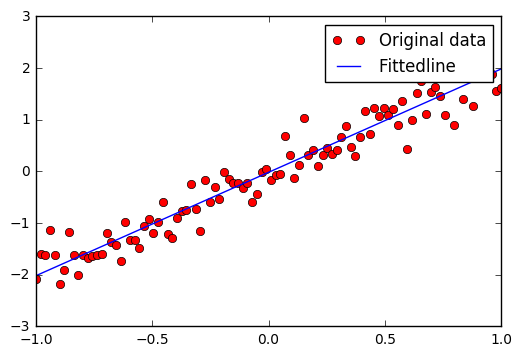

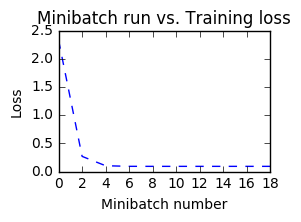

x=0.2, z= [0.382991]


In [4]:
# 启动session1
with tf.Session() as sess:
    sess.run(init)
    
    # 合并所有的summary
    merged_summary_op = tf.summary.merge_all()
    # 创建summary_writer，用于写文件
    summary_writer = tf.summary.FileWriter('log/minist_with_summaries', sess.graph)
    
    # 存放批次值和损失值
    plotdata = {'batchsize':[],'loss':[]}
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
            
             # 生成summary
            summary_str = sess.run(merged_summary_op, feed_dict={X:x, Y:y})
            # 将summary写入文件
            summary_writer.add_summary(summary_str, epoch)
        
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print('Epoch:', epoch+1, 'cost=', loss, 'W=', sess.run(W), 'b=', sess.run(b))
            if not (loss == 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print('Finished!')
    print('cost=', sess.run(cost, feed_dict={X:train_X, Y:train_Y}), 'W=', sess.run(W), 'b=', sess.run(b))    
    
    # 训练模型可视化
    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(2,2,1)
    plt.plot()
    plt.plot(plotdata['batchsize'], plotdata['avgloss'], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    
    plt.show()
    
    # 使用模型
    print('x=0.2, z=', sess.run(z, feed_dict={X:0.2}))